<a href="https://colab.research.google.com/github/dushalsaini119/superstore-sql-analysis/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df = data.copy()

In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)


,0
director,29.908028
country,9.435676
cast,9.367549
date_added,0.113546
rating,0.045418
duration,0.034064
show_id,0.000000
type,0.000000
title,0.000000
release_year,0.000000


In [ ]:
df = df.dropna(subset = ['rating', 'duration'])

In [ ]:
df['country'] = df['country'].fillna('Unknown')

In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)

,0
director,29.897727
cast,9.375000
date_added,0.113636
show_id,0.000000
title,0.000000
type,0.000000
country,0.000000
release_year,0.000000
rating,0.000000
duration,0.000000


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
df = df.dropna(subset=['date_added'])

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      6164 non-null   object        
 4   cast          7885 non-null   object        
 5   country       8702 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
 11  description   8702 non-null   object        
 12  year_added    8702 non-null   int32         
 13  month_added   8702 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 951.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


In [ ]:
df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(int)

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,111


In [ ]:
type_counts = df['type'].value_counts()
type_counts

,count
type,
Movie,6126
TV Show,2576


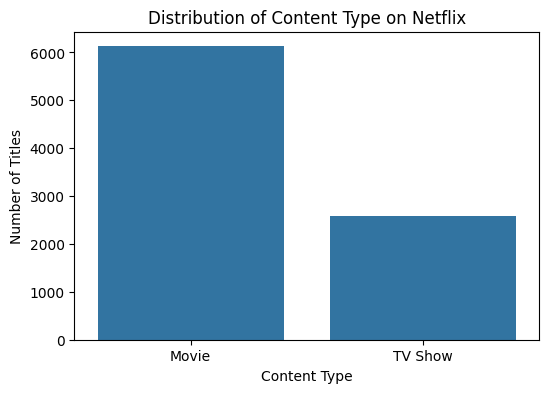

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()


In [ ]:
yearly_content = df['year_added'].value_counts().sort_index()
yearly_content

,count
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,10
2014,23
2015,73
2016,415


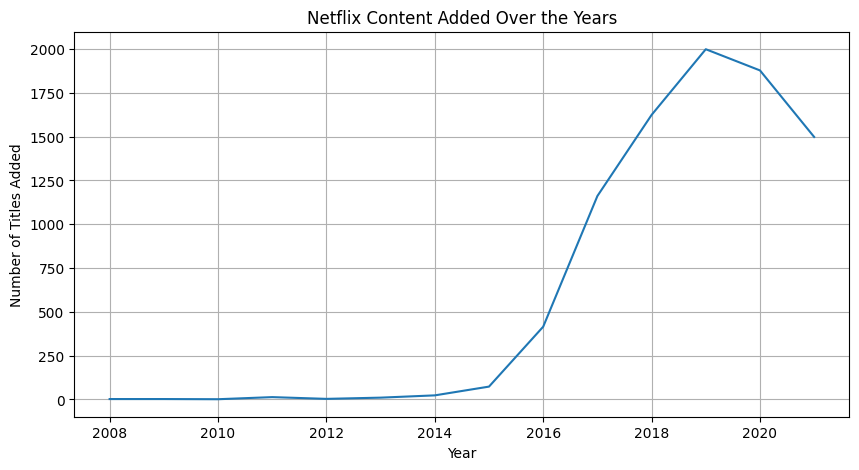

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(yearly_content.index, yearly_content.values)
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


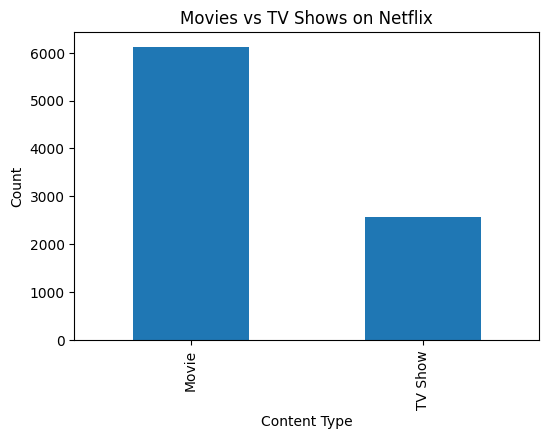

In [ ]:
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


In [ ]:
year_type = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
year_type.head(10)

type,Movie,TV Show
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,4
2014,19,4
2015,56,17
2016,251,164


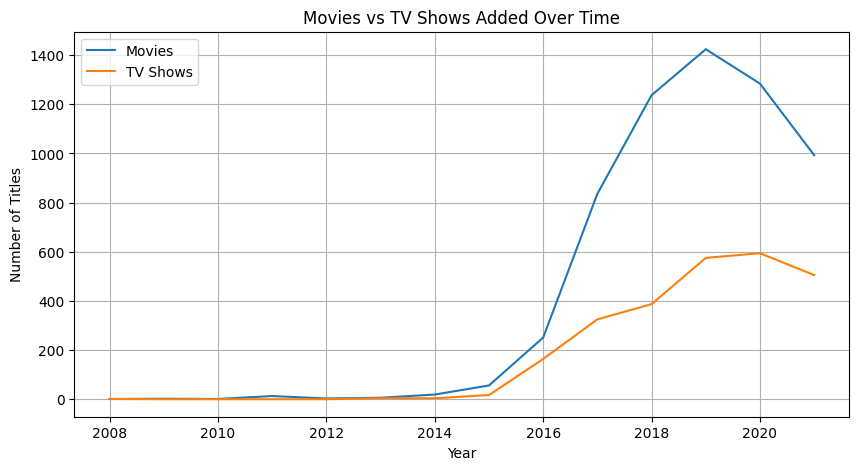

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(year_type.index, year_type['Movie'], label='Movies')
plt.plot(year_type.index, year_type['TV Show'], label='TV Shows')
plt.title('Movies vs TV Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
df1.head(15)              # Checkpoint

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,104


In [ ]:
# Split genres
df['genre'] = df['listed_in'].str.split(', ')

# Explode into multiple rows
df_exploded = df.explode('genre')

df_exploded[['title', 'genre']].head(15)

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
2,Ganglands,International TV Shows
2,Ganglands,TV Action & Adventure
3,Jailbirds New Orleans,Docuseries
3,Jailbirds New Orleans,Reality TV
4,Kota Factory,International TV Shows


In [ ]:
df_exploded['genre'].value_counts()

,count
genre,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1327
Documentaries,869
Action & Adventure,859
Independent Movies,756
TV Dramas,739
Children & Family Movies,641


In [ ]:
top_genres = df_exploded['genre'].value_counts().head(10)   # top ten genres
top_genres

,count
genre,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1327
Documentaries,869
Action & Adventure,859
Independent Movies,756
TV Dramas,739
Children & Family Movies,641


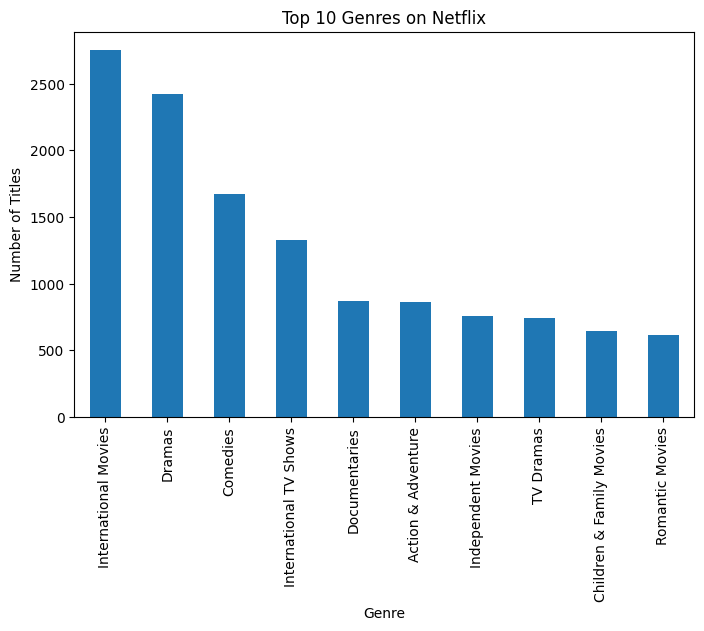

In [ ]:
plt.figure(figsize=(8,5))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


In [ ]:
genre_type = (
    df_exploded
    .groupby(['genre', 'type'])
    .size()
    .unstack()
    .fillna(0)
    .sort_values(by='Movie', ascending=False)
    .head(30)
)

genre_type

type,Movie,TV Show
genre,,
International Movies,2752.0,0.0
Dramas,2426.0,0.0
Comedies,1674.0,0.0
Documentaries,869.0,0.0
Action & Adventure,859.0,0.0
Independent Movies,756.0,0.0
Children & Family Movies,641.0,0.0
Romantic Movies,616.0,0.0
Thrillers,577.0,0.0


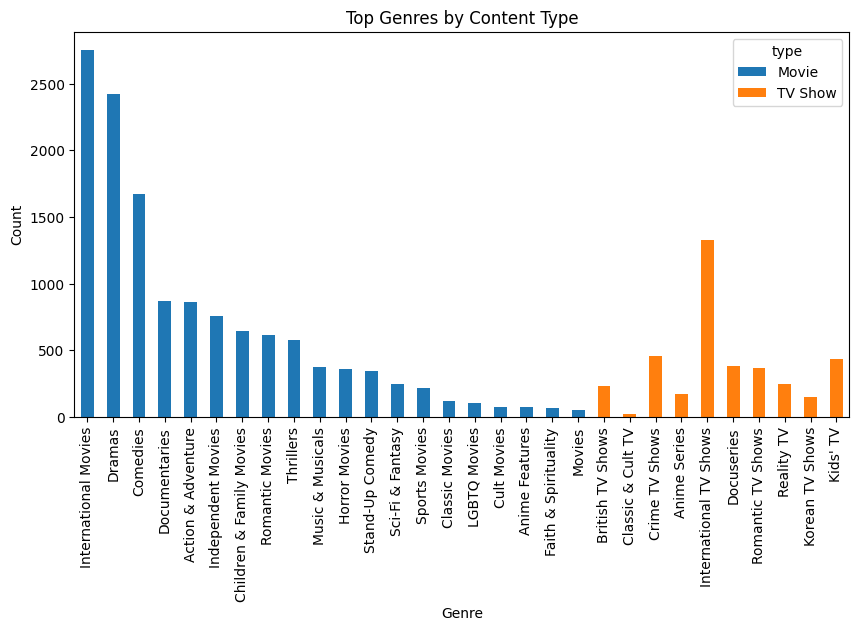

In [ ]:
genre_type.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Top Genres by Content Type')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
genre_type1 = (
    df_exploded
    .groupby(['genre', 'type'])
    .size()
    .unstack(fill_value=0)
)

# Add total column
genre_type1['total'] = genre_type1.sum(axis=1)

# Sort by total
genre_type1 = genre_type1.sort_values(by='total', ascending=False).head(10)

genre_type1


type,Movie,TV Show,total
genre,,,
International Movies,2752,0,2752
Dramas,2426,0,2426
Comedies,1674,0,1674
International TV Shows,0,1327,1327
Documentaries,869,0,869
Action & Adventure,859,0,859
Independent Movies,756,0,756
TV Dramas,0,739,739
Children & Family Movies,641,0,641


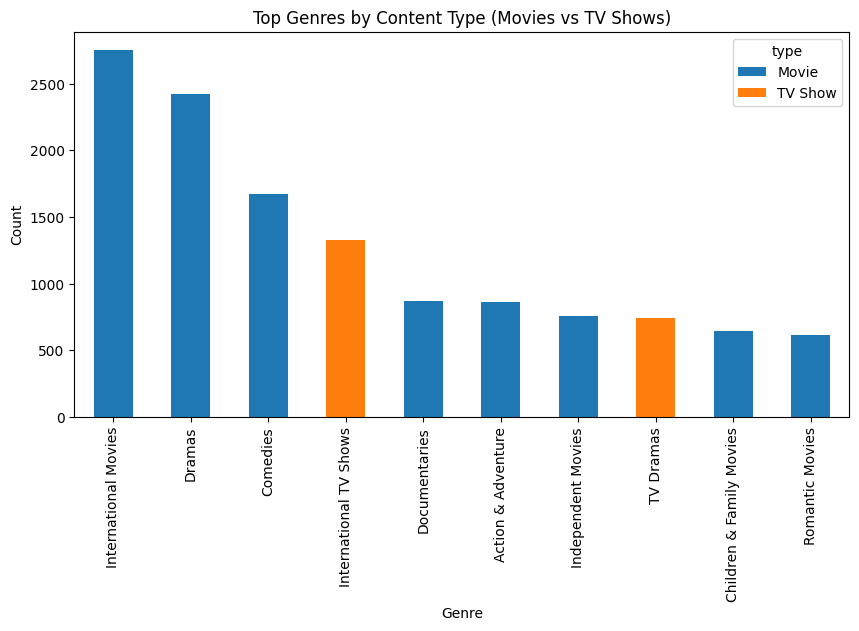

In [ ]:
genre_type1.drop(columns='total').plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title('Top Genres by Content Type (Movies vs TV Shows)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
df2 = df1.copy()  # Checkpoint

In [ ]:
# Split country column
df['country_split'] = df['country'].str.split(', ')

# Explode
df_country = df.explode('country_split')

df_country[['title', 'country_split']].head()

,title,country_split
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown
3,Jailbirds New Orleans,Unknown
4,Kota Factory,India


In [ ]:
top_countries = df_country['country_split'].value_counts().head(10)
top_countries

,count
country_split,
United States,3639
India,1045
Unknown,826
United Kingdom,785
Canada,432
France,389
Japan,313
Spain,228
South Korea,226


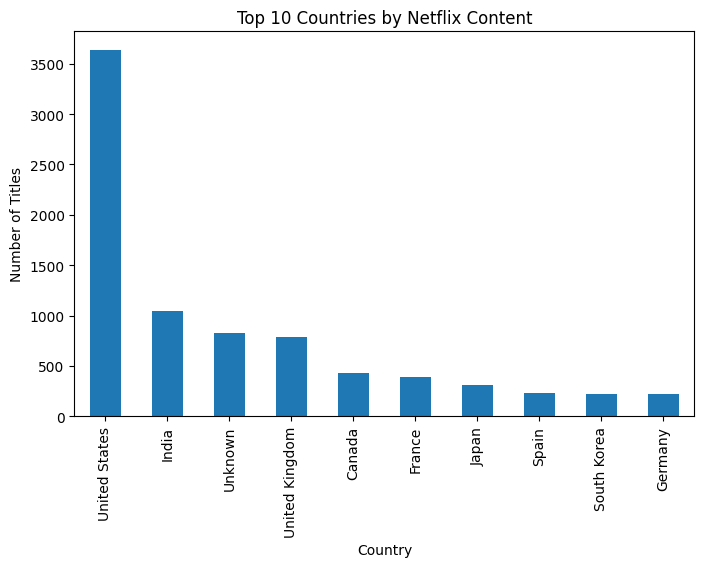

In [ ]:
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
country_type = (
    df_country
    .groupby(['country_split', 'type'])
    .size()
    .unstack(fill_value=0)
)

country_type['total'] = country_type.sum(axis=1)
top_country_type = country_type.sort_values(by='total', ascending=False).head(10)

top_country_type

type,Movie,TV Show,total
country_split,,,
United States,2748,891,3639
India,962,83,1045
Unknown,439,387,826
United Kingdom,532,253,785
Canada,319,113,432
France,303,86,389
Japan,119,194,313
Spain,171,57,228
South Korea,61,165,226


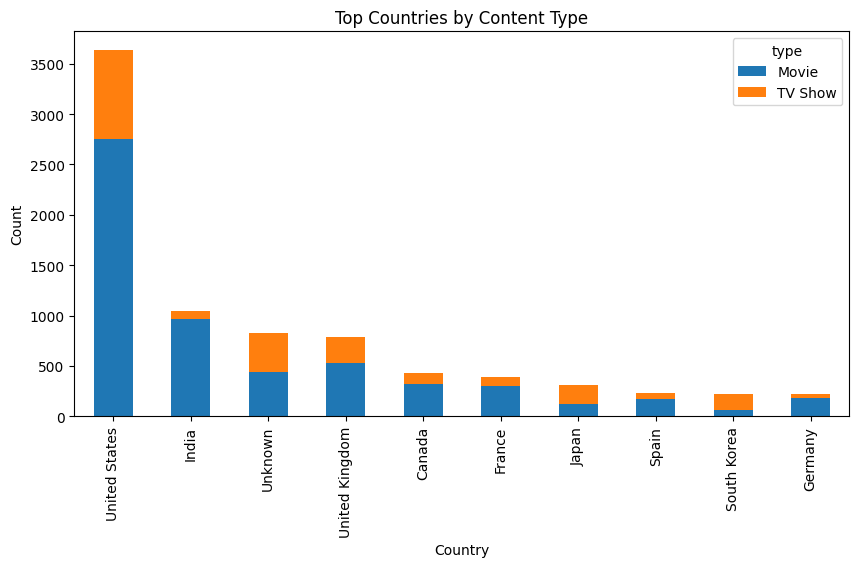

In [ ]:
top_country_type.drop(columns='total').plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title('Top Countries by Content Type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3183
TV-14,2133
TV-PG,838
R,799
PG-13,490
TV-Y7,330
TV-Y,300
PG,287
TV-G,212


In [ ]:
top_ratings = df['rating'].value_counts().head(10)
top_ratings

,count
rating,
TV-MA,3183
TV-14,2133
TV-PG,838
R,799
PG-13,490
TV-Y7,330
TV-Y,300
PG,287
TV-G,212


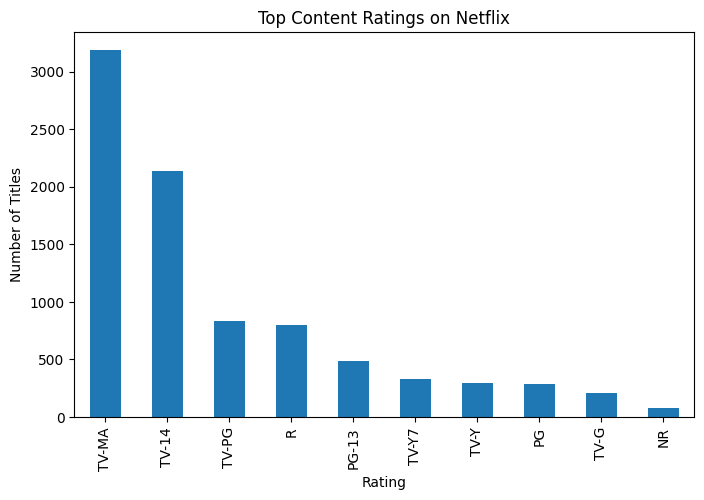

In [ ]:
plt.figure(figsize=(8,5))
top_ratings.plot(kind='bar')
plt.title('Top Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
rating_type = (
    df.groupby(['rating', 'type'])
    .size()
    .unstack(fill_value=0)
)

rating_type['total'] = rating_type.sum(axis=1)
rating_type = rating_type.sort_values(by='total', ascending=False).head(10)

rating_type

type,Movie,TV Show,total
rating,,,
TV-MA,2062,1121,3183
TV-14,1427,706,2133
TV-PG,540,298,838
R,797,2,799
PG-13,490,0,490
TV-Y7,139,191,330
TV-Y,131,169,300
PG,287,0,287
TV-G,126,86,212


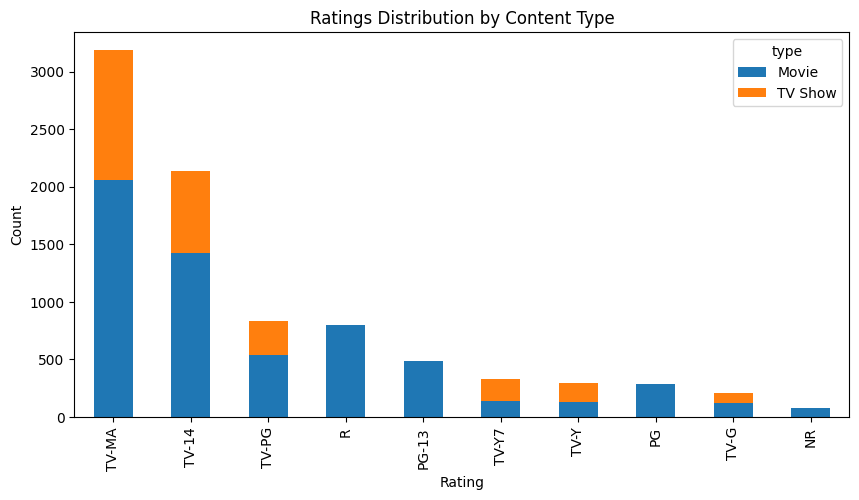

In [ ]:
rating_type.drop(columns='total').plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title('Ratings Distribution by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df['content_age'] = df['year_added'] - df['release_year']
df[['title', 'release_year', 'year_added', 'content_age']].head()

,title,release_year,year_added,content_age
0,Dick Johnson Is Dead,2020,2021,1
1,Blood & Water,2021,2021,0
2,Ganglands,2021,2021,0
3,Jailbirds New Orleans,2021,2021,0
4,Kota Factory,2021,2021,0


In [ ]:
df['content_age'].describe()

,content_age
count,8702.000000
mean,4.692944
std,8.795272
min,-3.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


In [ ]:
df_valid_age = df[df['content_age'] >= 0]

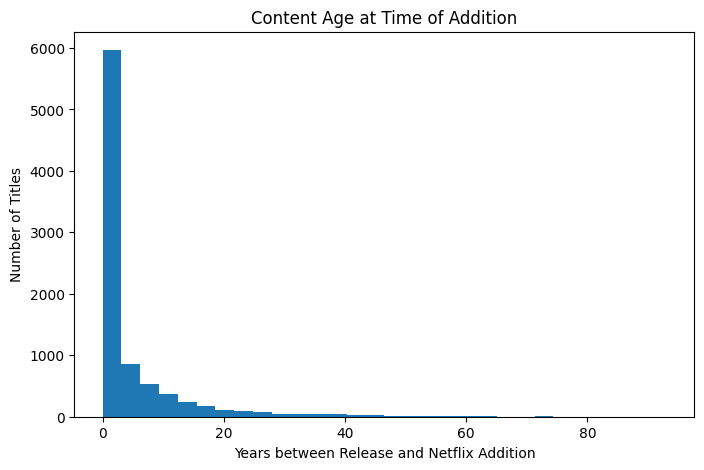

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_valid_age['content_age'], bins=30)
plt.title('Content Age at Time of Addition')
plt.xlabel('Years between Release and Netflix Addition')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
df_country_genre = df_exploded.copy()
df_country_genre['country_split'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_split')

In [ ]:
top_countries = df_country_genre['country_split'].value_counts().head(5).index

country_genre_analysis = (
    df_country_genre[df_country_genre['country_split'].isin(top_countries)]
    .groupby(['country_split', 'genre'])
    .size()
    .reset_index(name='count')
)

In [ ]:
dominant_genre = (
    country_genre_analysis
    .sort_values(['country_split', 'count'], ascending=[True, False])
    .groupby('country_split')
    .first()
)

dominant_genre

,genre,count
country_split,,
France,International Movies,207
India,International Movies,864
United Kingdom,British TV Shows,208
United States,Dramas,835
Unknown,International TV Shows,221


In [ ]:
dominant_genre_reset = dominant_genre.reset_index()
dominant_genre_reset

,country_split,genre,count
0,France,International Movies,207
1,India,International Movies,864
2,United Kingdom,British TV Shows,208
3,United States,Dramas,835
4,Unknown,International TV Shows,221


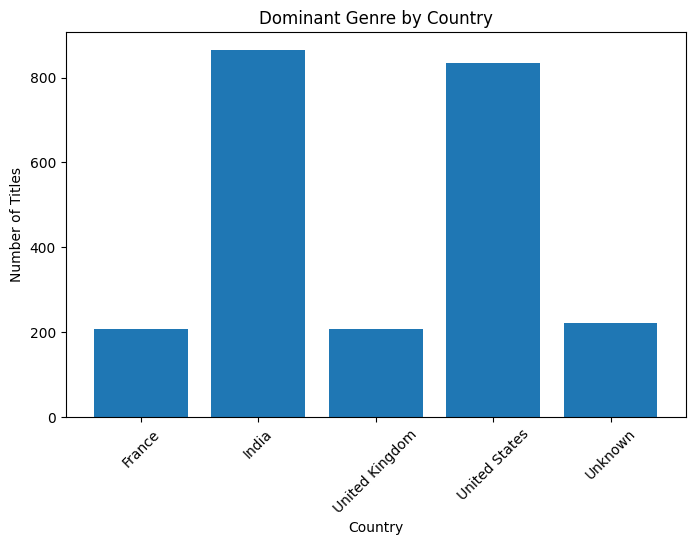

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(
    dominant_genre_reset['country_split'],
    dominant_genre_reset['count']
)

plt.title('Dominant Genre by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
heatmap_data = (
    country_genre_analysis
    .pivot(index='country_split', columns='genre', values='count')
    .fillna(0)
)

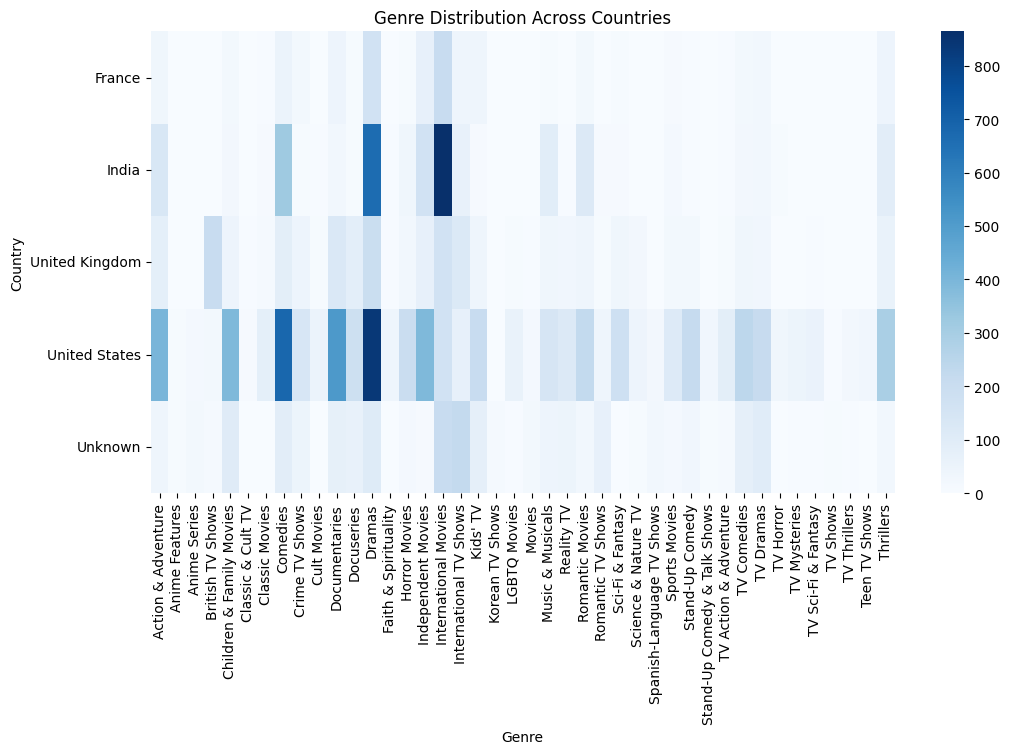

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Genre Distribution Across Countries')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()